In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys as sys

# https://stackoverflow.com/questions/40887753/display-matrix-values-and-colormap

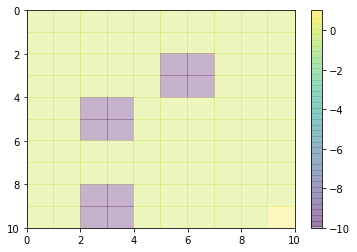

In [3]:
#Q1

ReFunc1 =[[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],
          [0,0,0,0,0,-10,-10,0,0,0],[0,0,0,0,0,-10,-10,0,0,0],
          [0,0,-10,-10,0,0,0,0,0,0],[0,0,-10,-10,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],
          [0,0,-10,-10,0,0,0,0,0,0],[0,0,-10,-10,0,0,0,0,0,1]]

ReFunc2 =[[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,-100,-100,-100,0,0,0],
          [0,0,0,0,-100,0,-100,0,0,0],[0,0,0,0,-100,0,-100,-100,-100,0],
          [0,0,0,0,-100,0,0,0,-100,0],[0,0,0,0,-100,0,0,0,-100,0],
          [0,0,0,0,-100,0,0,0,-100,0],[0,0,0,0,0,0,-100,-100,-100,0],
          [0,0,0,0,0,0,-100,0,0,0],[0,0,0,0,0,0,0,0,0,10]]
# ReFunc2 = np.rot90(ReFunc2)
# ReFunc1 = np.asmatrix(ReFunc1)
plt.pcolor(ReFunc1, alpha = 0.3)
plt.gca().invert_yaxis()
plt.colorbar()


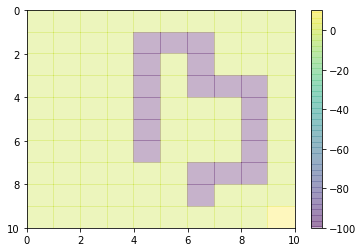

In [4]:
plt.pcolor(ReFunc2, alpha = 0.3)
plt.gca().invert_yaxis()
plt.colorbar()

In [5]:
#Q2

values = [[0 for i in range(10)] for i in range(10)]
moves = ['L', 'R', 'U', 'D']

In [6]:
class environment():
    def __init__(self,rewards,  epsilon):
        self.values = [[0 for i in range(10)] for i in range(10)]
        self.moves = ['L', 'R', 'U', 'D']
        self.rewards = rewards
        self.delta = sys.maxsize 
        self.epsilon = epsilon
        self.policies = [[0 for i in range(10)] for i in range(10)]
    def reset():
        self.values = [[0 for i in range(10)] for i in range(10)]
        self.policies = [[0 for i in range(10)] for i in range(10)]

    def estimation(self,states):
        while self.delta > self.epsilon:
            self.delta = 0
            for x in range(len(states)):
                for y in range(len(states[x])):
#                     value_temp = self.values[x][y]
                    maxn = []
                    for move in self.moves:
                        maxn.append(self.eval_direction(x,y,move, 0.1,0.8))
                    maxnumb = max(maxn)                    
                    self.delta = max(self.delta, abs(self.values[x][y] - maxnumb))
                    self.values[x][y] = maxnumb
                    
#     def estimation_policy(self,states):
#         while self.delta > self.epsilon:
#             self.delta = 0
#             for x in range(len(states)):
#                 for y in range(len(states[x])):
# #                     value_temp = self.values[x][y]
#                     maxn = []
#                     for move in self.moves:
#                         a=self.eval_direction(x,y,move, 0.1,0.8)
#                         maxn.append([a, move])
# #                         print(a,move)
#                     maxnumb = max(maxn, key = lambda x :x[0])
#                     self.delta = max(self.delta, abs(self.values[x][y] - maxnumb[0]))
#                     self.values[x][y] = maxnumb[0]
#                     self.policies[x][y] = maxnumb[1]
# #                     print("best,",maxnumb)


    def estimation_policy(self,states):
        
        for x in range(len(states)):
            for y in range(len(states[x])):
                maxn = []
                directions = [(x-1,y),(x+1,y),(x,y+1),(x,y-1)]

                for i, move in enumerate(self.moves):
    #                         if directions[i][0] >=0 and directions[i][0] <= 9 and directions[i][1] >=0 and directions[i][1] <= 9:
    # #                             print(directions[i][0],directions[i][1])
                    maxn.append([self.eval_direction(x,y,move, 0.1,0.8), move])
                maxnumb = max(maxn, key = lambda x :x[0])    
                self.policies[x][y] = maxnumb[1]    

                        
                        
#                         a=self.eval_direction(x,y,move, 0.1,0.8)
#                         maxn.append([a, move])
# #                         print(a,move)
#                     maxnumb = max(maxn, key = lambda x :x[0])
#                     self.delta = max(self.delta, abs(self.values[x][y] - maxnumb[0]))
#                     self.values[x][y] = maxnumb[0]
#                     self.policies[x][y] = maxnumb[1]
# #                     print("best,",maxnumb)
                
    def eval_direction(self,x,y,direction,w ,discount):
        # probabilities indexed by left, right, up, down
        probabilities = [w/4,w/4,w/4,w/4]
        # when encoutering edge cases, direction off the grid will be replaced with staying in same block
        directions = [(x-1,y),(x+1,y),(x,y+1),(x,y-1)]
        sumn = []
        if x > 0 and x <9 and y > 0 and y < 9:


            if direction == 'L':
                probabilities[0] = 1-w+w/4
            elif direction == 'R':
                probabilities[1] = 1-w+w/4
            elif direction == 'U':
                probabilities[2] = 1-w+w/4
            elif direction == 'D':
                probabilities[3] = 1-w+w/4
#             for x, direction in enumerate(directions): 
#                 print(x,direction)
#                 sumn.append(probabilities[x] * (self.rewards[direction[0]][direction[1]]+ discount*values[direction[0]][direction[1]]))

        elif (x == 0 and y == 0) or (x == 0 and y == 9) or (x == 9 and y == 0) or (x == 9 and y == 9):
            if (x == 0 and y == 0):
                directions[0] = (x,y)
                directions[3] = (x,y)
                if direction == 'L' or direction == 'D':
                    probabilities[0] = 1-w+w/4+w/4
                    probabilities[3] = 0
                elif direction == 'R':
                    probabilities[1] = 1-w+w/4
                elif direction == 'D':
                    probabilities[2] = 1-w+w/4
            elif (x == 0 and y == 9):
                directions[0] = (x,y)
                directions[2] = (x,y)
                if direction == 'L' or direction == 'U':
                    probabilities[0] = 1-w+w/4+w/4
                    probabilities[2] = 0
                elif direction == 'R':
                    probabilities[1] = 1-w+w/4
                elif direction == 'U':
                    probabilities[3] = 1-w+w/4
            elif  (x == 9 and y == 0):
                directions[1] = (x,y)
                directions[3] = (x,y)
                if direction == 'R' or direction == 'D':
                    probabilities[1] = 1-w+w/4+w/4
                    probabilities[3] = 0
                elif direction == 'L':
                    probabilities[0] = 1-w+w/4
                elif direction == 'U':
                    probabilities[2] = 1-w+w/4
            elif  (x == 9 and y == 9):            
                directions[1] = (x,y)
                directions[2] = (x,y)
                if direction == 'R' or direction == 'U':
                    probabilities[1] = 1-w+w/4+w/4
                    probabilities[2] = 0
                elif direction == 'L':
                    probabilities[0] = 1-w+w/4
                elif direction == 'U':
                    probabilities[3] = 1-w+w/4
                    
    #         for x, direction in enumerate(directions):         
    #             maxn.append(probabilities[x] * (reward[direction[0]][direction[1]]+ discount*values[direction[0]][direction[1]]))
    #         return sum(sumn)
        # edge case
        else:
            if direction == 'L':
                probabilities[0] = 1-w+w/4
            elif direction == 'R': 
                probabilities[1] = 1-w+w/4
            elif direction == 'U':
                probabilities[2] = 1-w+w/4
            elif direction == 'D':
                probabilities[3] = 1-w+w/4 

#             for x, direction in enumerate(directions):         
#                 maxn.append(probabilities[x] * (self.rewards[direction[0]][direction[1]]+ discount*values[direction[0]][direction[1]]))
#             return sum(sumn)
#             print("directooo",directions, direction)   
            if x-1 < 0:
                directions[0] = (x,y)
            elif x+1 > 9:
                directions[1] = (x,y)
            elif y+1 > 9:
                directions[2] = (x,y)
            elif y-1 < 0:
                directions[3] = (x,y)
        for x, direction in enumerate(directions): 
#             print(x,direction)
            sumn.append(probabilities[x] * (self.rewards[direction[0]][direction[1]]+ discount*self.values[direction[0]][direction[1]]))


        return sum(sumn)    
        

        
        
        
        


None
[[0.015756078670264788, 0.05323930590856204, 0.07875826004372928, 0.11103093210307545, 0.15241194200470715, 0.20574787221419444, 0.2810561614904813, 0.37403281527913873, 0.4847707053952173, 0.6091978818654598], [0.026806309858342744, 0.04223660855558688, 0.06160792302124546, 0.08642187910020718, 0.10839846254199442, -0.10593214036889192, 0.09064774266499365, 0.47200009483264355, 0.6251493415833222, 0.7869383089520442], [0.020904707957794783, 0.032598934157139416, 0.042413135449918656, 0.05626193328701162, -0.1863306906687002, -0.5930127308774422, -0.25609639621281144, 0.35545449533523327, 0.8071452168783211, 1.0182769172941455], [0.015954724214725702, 0.014365546167876156, -0.2371479012933024, -0.22968768291412228, -0.2753435769939466, -0.2703978477184148, -0.10370552950829245, 0.543061874820866, 1.046189028338866, 1.3149216070837042], [0.0068014927464802736, -0.2582106276497236, -0.7024675975140886, -0.5354889456042892, -0.0062295435297444746, 0.34601957529801797, 0.5445612592104

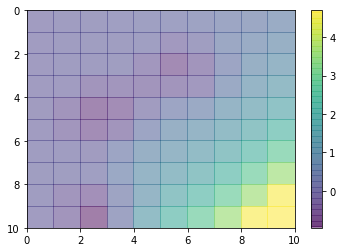

In [8]:
q2 = environment(ReFunc1, 0.01)
print(q2.estimation(values))
print(q2.values)

plt.pcolor(q2.values, alpha = 0.5)
plt.gca().invert_yaxis()
plt.colorbar()

In [9]:

def plot_optimal_policy(policy):
    q2 = environment(policy, 0.01)
    q2.estimation(values)
    q2.values =  np.rot90(np.rot90(np.rot90(q2.values)))
    q2.rewards = np.rot90(np.rot90(np.rot90(q2.rewards)))
    # q2.values=[x[::-1] for x in q2.values] 
    q2.estimation_policy(values)
    # print(q2.policies)
    # print(q2.values)

    fig, ax = plt.subplots()

    min_val, max_val = 0, 10
    # ax.invert_yaxis()
    # for i in range(10):
    #     for j in range(10):
    #         c = round(q2.values[i][j], 3)
    #         ax.text(i+0.5, j+0.5, str(c), va='center', ha='center')

    # plt.matshow(q2.values)
    for i in range(10):
        for j in range(10):
            if q2.policies[i][j] == 'U':
                c = '⇧'
            elif q2.policies[i][j] == 'D':
                c = '⇩'
            elif q2.policies[i][j] == 'R':
                c = '⇨'
            elif q2.policies[i][j] == 'L':
                c = '⇦'
            ax.text(i+0.5, j+0.5, str(c), va='center', ha='center')
# plt.gca().invert_yaxis()

# plt.matshow(q2.values)
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)
    # ax.set_xticks(np.arange(max_val+1))
    # ax.set_yticks(np.arange(max_val+1,step = -1))
    # plt.pcolor(ReFunc2, alpha = 0.5)
    # plt.colorbar()
    ax.grid()
    xticks = range(max_val+1)
    plt.xticks(xticks)
    plt.yticks(xticks, xticks[::-1])
    ax.xaxis.tick_top()



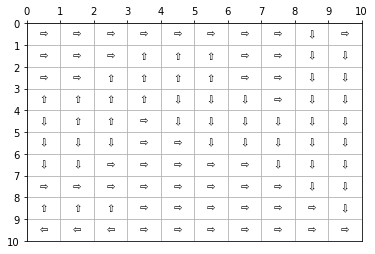

In [17]:
#q5
plot_optimal_policy(ReFunc1)
# plot_optimal_policy(ReFunc2)


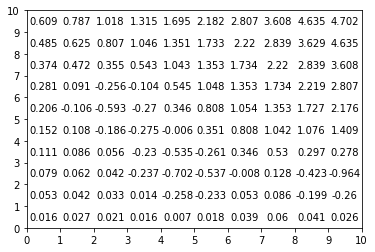

In [18]:
fig, ax = plt.subplots()

min_val, max_val = 0, 10
for i in range(10):
    for j in range(10):
        c = round(q2.values[i][j], 3)
        ax.text(i+0.5, j+0.5, str(c), va='center', ha='center')
# ticks = np.arange(max_val+1)
# plt.matshow(q2.values)
ax.set_xlim(min_val, max_val)
ax.set_ylim(min_val, max_val)
ax.set_xticks(np.arange(max_val+1))
ax.set_yticks(np.arange(max_val+1))

In [19]:
def plot_values(policy):
    q2 = environment(policy, 0.01)
    q2.estimation(values)
    q2.values =  np.rot90(np.rot90(np.rot90(q2.values)))
    q2.rewards = np.rot90(np.rot90(np.rot90(q2.rewards)))
    # q2.values=[x[::-1] for x in q2.values] 
    q2.estimation_policy(values)
    # print(q2.policies)
    # print(q2.values)

    fig, ax = plt.subplots()

    min_val, max_val = 0, 10

    min_val, max_val = 0, 10
    for i in range(10):
        for j in range(10):
            c = round(q2.values[i][j], 3)
            ax.text(i+0.5, j+0.5, str(c), va='center', ha='center')

    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)

    ax.grid()
    xticks = range(max_val+1)
    plt.xticks(xticks)
    plt.yticks(xticks, xticks[::-1])
    ax.xaxis.tick_top()



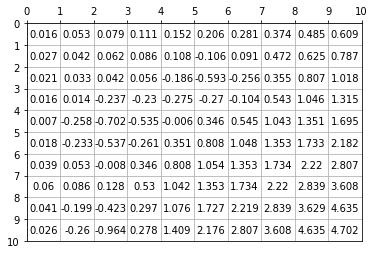

In [20]:
plot_values(ReFunc1)

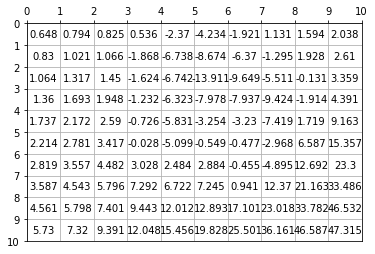

In [21]:
plot_values(ReFunc2)